# Climate Change Belief Analysis 2022

### Overview: Predict an individual’s belief in climate change based on historical tweet data.
   
- Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. 

## Problem Statement
#### In this project we would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to companies market research efforts in gauging how their product/service may be received.

### Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

### Sentiment of tweet Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="pZRIYy5yWLxOVTSX7gAbXSwXX",
    project_name="climate-change-belief-analysis",
    workspace="sodiq-olamide")

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/sodiq-olamide/climate-change-belief-analysis/b337f1d9c4194cbb97804e6174256d89



In [3]:
#NumPy can be used to perform a wide variety of mathematical operations on arrays
import numpy as np
#Pandas is used for working with data sets.It has functions for analyzing, cleaning, exploring, and manipulating data.
import pandas as pd
#Below are comprehensive libraries for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
from plotly import graph_objects as go
# set plot style
sns.set()
#Regular Expression used for data cleaning
import re



import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we to load the data file's into a DataFrame. |

---

In [5]:
#Load the tweet dataset into a dataframe named "df"
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

We stored the train dataset into a variable named "df".

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we perform an in-depth analysis of all the variables in the DataFrame. |

---


   #### Getting a view of our training dataset

In [5]:
#Viewing the dataframe.
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


  #### Get feature name and their types - to check for missing values

In [6]:
## getting feature name and their types - to check for missing values
print("Feature names and their types : \n",df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB
Feature names and their types : 
 None 



Both sentiment and tweet id are numerical columns with an Integer datatype. The message column is object type. There are 15819 values in each column, which confirms there is no missing value

#### Further check for null values

In [7]:
## NULL values in the data
print ("Null Value Statistics:", '\n',df.isnull().sum()) ## Sum will tell the total number of NULL values inside the dataset

Null Value Statistics: 
 sentiment    0
message      0
tweetid      0
dtype: int64


The data is complete - no column has missing values in the dataset

Get the shape of the data to understand the number of observations in the dataset

In [8]:
## 6) shape of data
print("Shape of Data : \n", df.shape, "\n")
print("No. of rows in the data = ", df.shape[0])
print("No. of columns in the data = ", df.shape[1])

Shape of Data : 
 (15819, 3) 

No. of rows in the data =  15819
No. of columns in the data =  3


The tweet train dataset contains 15819 rows and 3 columns 

#### Distribution of tweets by sentiment

In [11]:
# see statistics for categorical features
print("See distribution of messages per sentiment : ")
count = df.groupby("sentiment").count()["message"].reset_index().sort_values(by="message", ascending=False)
count.style.background_gradient(cmap="Purples")

See distribution of messages per sentiment : 


,sentiment,message
2,1,8530
3,2,3640
1,0,2353
0,-1,1296


1 Pro tweets: the number of tweets that support the belief of man-made climate change 8530.

2 News: the number of tweets that link to factual news about climate change are 3640

0 Neutral: the number of tweets that neither support nor refute the belief of man-made climate change are 2353

-1 Anti: the number of tweets that does not believe in man-made climate change are 1296

In [14]:
## see statistics for non- numerical features
print("See statistics for non- numerical columns : ")
df.groupby('sentiment').describe(include=['object'])

See statistics for non- numerical columns : 


message                                                            \
            count unique                                                top   
sentiment                                                                     
-1           1296   1222  RT @realDonaldTrump: The concept of global war...   
 0           2353   2245  RT @ULTRAVlOLENCE: Interviewer: 'What do you t...   
 1           8530   7224  RT @StephenSchlegel: she's thinking about how ...   
 2           3640   3542  RT @business: China tells Trump climate change...   

                
          freq  
sentiment       
-1          22  
 0          20  
 1         307  
 2          12

out of all tweets, there are a total of 14229 unique tweets. the most common value is "RT @StephenSchlegel: she's thinking about how...". it occurs 307 times

In [40]:
fig = go.Figure(go.Funnel(
    y = ["Pro","News", "Nuetral", "Anti"],
    x = df.sentiment.value_counts(normalize = True) * 100
    ))
fig.show()

##UNBALANCED DATA

Pro tweets occupy 53.92% of the total tweets.

News tweets occupy 23.02% of the total tweets.

Neutral tweets occupy 14.87% of the total tweets.

Anti tweets occupy 8.19% of the total tweets.


It clear that more than half of the tweets samples supports the beliefs of man-made climate change, while very few tweet sample does not believe in man-made climate change.

Viewing an Entire length of message feature in the tweet dataframe, so as to find patterns on how most tweet messages are typed.

In [38]:
print('Show the full_text of 10 tweets: ')
for tweet in df['message'][100:110]:
    print(tweet)

Show the full_text of 10 tweets: 
So we have a director of EPA who is a climate change denier. No a coal lobbies to as deputy EPA Chief. Environment… https://t.co/XlxHbWNJuM
RT @IrisRimon: The Chinese just broke massive iceberg in Antarctica as part of their global warming hoax.
RT @thinkprogress: Where are Rex Tillerson’s climate change emails?
https://t.co/LyANHBPZfT
RT @M3thG0d: If global warming isn't real why did club penguin shut down
RT @NDeNicolaMD: 500,000 doctors agree: climate change is making us sick #EarthDay #MarchForScience #HealthAndClimate…
RT @tristinc1: our president think climate change is a hoax made by the chinese &amp; our vice president thinks being gay is a curable disease.Ã¢â‚¬Â¦
80% of GHG via resevoirs are methane. Resevoirs play a substantial role in global warming. https://t.co/CNHiU818Ky https://t.co/58nmAFxcmP
RT @Fruitloopian: Why is there snow in March if we have global warming?
RT @GreenHarvard: “Universities have a uniquely important role to play in 

Alright... Progress, we can now easily see the full_text in every row of the message.


From above analysis, we have found that 'tweetid' is NOT required in our analysis. Therefore, we remove unnecessary columns from our training data

#### Getting More Information through visualization.

In [6]:
full_text = " ".join(df['message'])

We joined the entire message column in the train dataset, so has to be able to get the most common word or words in the data

#### Visualizing the most common words with Word Cloud

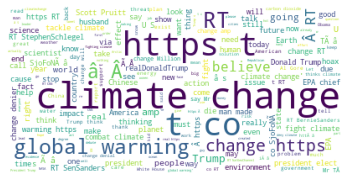

In [8]:
wc = WordCloud(background_color='white')
img = wc.generate(full_text)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.show()


The Most repeated words in the tweet message are:

    . Climate, Change, Global, Warming, Change, https, RT, Today, CO e.t.c. 

### Key Insights

 A- Message Column contains stopwords and, unimportant words like:

     1. RT,
     2. #,
     3. @
     4. https: links
     5. emoji's 
     6. ( )
     7. +
     8. !~ "" 

 B- The Dataset Comprises of Unbalanced Data

 C- Giving that "tweetid" comprises of unique values, it will be   non-relevant in the analysis, therefore i will be removed later on.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we are required to create one or more regression models that are able to accurately predict the Individual Beliefs on Climate Changes. |

---

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section we are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [3]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sodiq-olamide/climate-change-belief-analysis/b337f1d9c4194cbb97804e6174256d89
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (1.25 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Uploading 1 metrics, params and output messages
COMET INFO: Waiting for completion of the fil